In [232]:
import pandas as pd
%matplotlib inline 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [256]:
infile1 = "../data/SetVariablesCashOnline_Hernan_v2.csv"
data = pd.read_csv(infile,sep=',')

In [260]:
infile2 = "../data/MoraMayor90ever.csv"
mora = pd.read_csv(infile2,sep=',')

In [274]:
test=mora[mora.Flag90>0].groupby("PreNro").count()["Plazo"]

In [283]:
morosos = mora[mora.Flag90>0].drop_duplicates("PreNro")["PreNro"]

In [289]:
mora[mora.Flag90>0].head()

,PreNro,TdesdeLiquidacion,Flag90,Plazo
313,4316.0,13.0,1.0,24.0
314,4316.0,14.0,1.0,24.0
315,4316.0,15.0,1.0,24.0
316,4316.0,16.0,1.0,24.0
317,4316.0,17.0,1.0,24.0


In [299]:
mora.head()

,PreNro,TdesdeLiquidacion,Flag90,Plazo
0,4292.0,0.0,0.0,24.0
1,4292.0,1.0,0.0,24.0
2,4292.0,2.0,0.0,24.0
3,4292.0,3.0,0.0,24.0
4,4292.0,4.0,0.0,24.0


In [328]:
temp = mora[mora["Flag90"] > 0.0]
temp2 = temp[mora["Plazo"]==12.0]
temp2.shape[0] / float(temp.shape[0])

/Users/jorgebrea/miniconda2/envs/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.2671564669788471

In [331]:
temp = mora[mora["Flag90"] > 0.0]
temp2 = temp[mora["Plazo"]==8.0]
temp2.shape[0] / float(temp.shape[0])

/Users/jorgebrea/miniconda2/envs/condaenv/lib/python2.7/site-packages/ipykernel_launcher.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


0.004279024705312449

In [297]:
mora[.drop_duplicates("PreNro") and (mora.Plazo == 12)].shape[0]# / mora[mora.Plazo ==12].shape[0]

33896

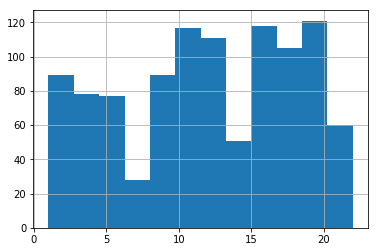

In [279]:
test.hist(bins=12)

In [335]:
data["Fecha_Liquidado"].max()

'9/9/16 0:00'

In [157]:
print("number of samples: ", data.shape[0])
print("number of variables: ", data.shape[1])

('number of samples: ', 4004)
('number of variables: ', 113)


In [ ]:
def get_pyp_date(x):
    if str(x) == '1800/01/01':
        return pd.to_datetime("2001-01-18")
    if str(x) == 'nan':
        return x
    else: 
        month, day, year = str(x).split('/')
        if int(year) > 18:
            year = '19'+year
        else:
            year = '20'+year
        if int(month) < 10:
            month = '0'+month
        if int(day) < 10:
            day = '0'+day
        #print pd.to_datetime(year+'-'+month+'-'+day)
        return pd.to_datetime(year+'-'+month+'-'+day)


In [158]:
#Fix dates formats
dates1 = ['Fecha_Liquidado','FechaSolicitud','PyP_DeudaSistemaFinanciero_Actual_Fecha',
        'PyP_DeudaSistemaFinanciero_Ult6M_Fecha','PyP_DeudaSistemaFinanciero_Ult12M_Fecha',
        'PyP_DeudaSistemaFinanciero_Ult24M_Fecha']
dates2 = ['Nosis_FecNac', 'Nosis_FecActividad',
        'Nosis_SSSalud_ObraSoc_FecAlta', 'Nosis_SSSalud_ObraSoc_FecAct', 'Nosis_FechaNovRelDep']
        
dates3 = ['PyP_RelacionLaboral_UltimoPeriodoInformado','PyP_RelacionLaboral_AltaUltimoEmpleo',
          'Nosis_SitBCRAActual_Periodo']

for v in dates1:
    data[v] = data[v].map(lambda x: pd.to_datetime(x))

for v in dates2:
    data[v] = data[v].map(lambda x: pd.to_datetime(str(int(x))[:4]+'-'+str(int(x))[4:6]+'-'+str(int(x))[6:8]) if ~np.isnan(x) and x != 0.0 else np.nan)

for v in dates3:
    data[v] = data[v].map(lambda x: pd.to_datetime(str(int(x))[:4]+'/'+str(int(x))[4:6]+'/01') if ~np.isnan(x) else x)
    
data['PyP_FechaNacimiento'] = data['PyP_FechaNacimiento'].map(lambda x:get_pyp_date(str(x)))

In [159]:
#Select certain fields as binary variables
binarias = ['PyP_TieneJuicios','PyP_DeudaSistemaFinanciero_Ult6M_Entidad',
           'PyP_DeudaSistemaFinanciero_Ult12M_Entidad','PyP_DeudaSistemaFinanciero_Ult24M_Entidad',
           'Nosis_SSSalud_ObraSoc_Titular_Condicion','Nosis_AportesPatronales',
           'Nosis_AportesComoEmpleador','Nosis_AportesServicioDomestico','Nosis_Novedad_Cheques','Nosis_Bancarizado',
           'Nosis_Empleadores1']

data['PyP_TieneJuicios'] = data['PyP_TieneJuicios'].map(lambda x: 1 if x == 'SI' else 0 )
data['PyP_DeudaSistemaFinanciero_Ult6M_Entidad'] = data['PyP_DeudaSistemaFinanciero_Ult6M_Entidad'].map(lambda x: 0 if x == np.nan else 1)
data['PyP_DeudaSistemaFinanciero_Ult12M_Entidad'] = data['PyP_DeudaSistemaFinanciero_Ult12M_Entidad'].map(lambda x: 0 if x == np.nan else 1)
data['PyP_DeudaSistemaFinanciero_Ult24M_Entidad'] = data['PyP_DeudaSistemaFinanciero_Ult24M_Entidad'].map(lambda x: 0 if x == np.nan else 1)
data['PyP_DeudaSistemaFinanciero_Ult24M_Entidad'] = data['PyP_DeudaSistemaFinanciero_Ult24M_Entidad'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_SSSalud_ObraSoc_Titular_Condicion'] = data['Nosis_SSSalud_ObraSoc_Titular_Condicion'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_AportesPatronales'] = data['Nosis_AportesPatronales'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_AportesComoEmpleador'] = data['Nosis_AportesComoEmpleador'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_AportesServicioDomestico'] = data['Nosis_AportesServicioDomestico'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_Novedad_Cheques'] = data['Nosis_Novedad_Cheques'].map(lambda x: 1 if x == "SI" or x == "Si" else 0)
data['Nosis_Empleadores1'] = data['Nosis_Empleadores1'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_ObrasSociales'] = data['Nosis_ObrasSociales'].map(lambda x: 0 if x == np.nan else 1)
data['Nosis_Bancarizado'] = data['Nosis_Bancarizado'].map(lambda x: 1 if x == "SI" else 0)

In [160]:
#Turn this categorica variable into numerical
categoricas = ['Nosis_NSE2']
nse = {np.nan:-1,'D2':0, 'D1':1, 'C3':2, 'C2':3, 'C1':4, 'B':4, 'A':5}
data['Nosis_NSE2'] = data['Nosis_NSE2'].map(lambda x: nse[x])

In [167]:
#check out data types
ints = [i for i in data.columns if data[i].dtypes == 'int64']
floats = [i for i in data.columns if data[i].dtypes == 'float']
dates = dates1 + dates2 + dates3
objects = [i for i in data.columns if data[i].dtypes == 'object']

selected = ints+floats+dates+binarias+categoricas

In [179]:
print selected

['PreNro', 'RiePedID', 'Plazo', 'CapitalLiquidado', 'Documento', 'PyP_TieneJuicios', 'PyP_DeudaSistemaFinanciero_Ult6M_Entidad', 'PyP_DeudaSistemaFinanciero_Ult12M_Entidad', 'PyP_DeudaSistemaFinanciero_Ult24M_Entidad', 'Nosis_SSSalud_ObraSoc_Titular_Condicion', 'Nosis_NSE2', 'Nosis_Empleadores1', 'Nosis_ObrasSociales', 'Nosis_AportesPatronales', 'Nosis_AportesComoEmpleador', 'Nosis_AportesServicioDomestico', 'Nosis_Novedad_Cheques', 'Nosis_Bancarizado', '90@12', '90@9', '30@6', '30@3', 'IngresosDeclarados', 'IngresosUtilizadosOferta', 'PyP_NroDocumento', 'PyP_CUIT', 'PyP_DeudaSistemaFinanciero_Actual_Situacion', 'PyP_DeudaSistemaFinanciero_Actual_MontoMaximo', 'PyP_DeudaSistemaFinanciero_Actual_DeudaActual', 'PyP_DeudaSistemaFinanciero_Ult6M_Situacion', 'PyP_DeudaSistemaFinanciero_Ult6M_MontoMaximo', 'PyP_DeudaSistemaFinanciero_Ult6M_DeudaActual', 'PyP_DeudaSistemaFinanciero_Ult12M_Situacion', 'PyP_DeudaSistemaFinanciero_Ult12M_MontoMaximo', 'PyP_DeudaSistemaFinanciero_Ult12M_DeudaActu

In [ ]:
datafilt = data[data.Nosis_SCORE2 > 10]

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a186b2d90>]], dtype=object)

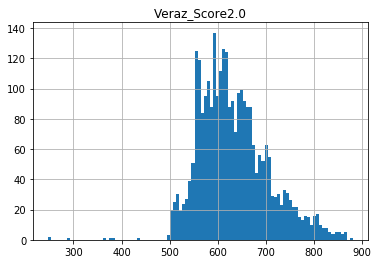

In [188]:
pd.DataFrame.hist(datafilt,"Veraz_Score2.0",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1dc1bfd0>]], dtype=object)

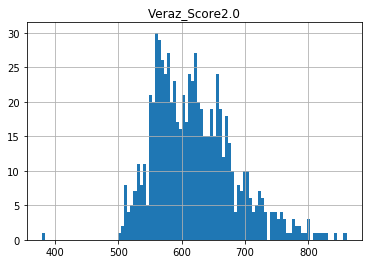

In [286]:
pd.DataFrame.hist(datafilt[datafilt.PreNro.isin(morosos)],"Veraz_Score2.0",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a250ca6d0>]], dtype=object)

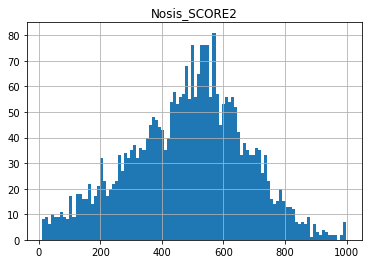

In [288]:
pd.DataFrame.hist(datafilt,"Nosis_SCORE2",bins=100)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a24eaa410>]], dtype=object)

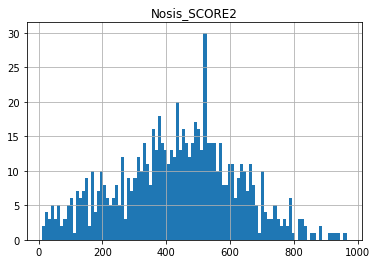

In [287]:
pd.DataFrame.hist(datafilt[datafilt.PreNro.isin(morosos)],"Nosis_SCORE2",bins=100)

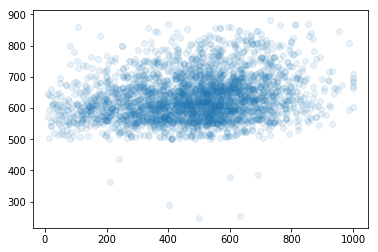

In [187]:
plt.scatter(datafilt["Nosis_SCORE2"],datafilt["Veraz_Score2.0"],alpha = 0.1)

Text(0,0.5,'#prestamos')

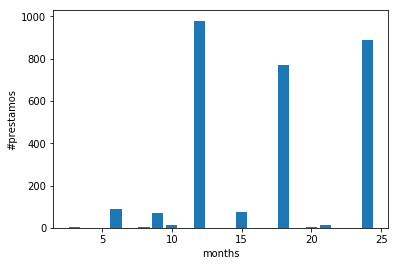

In [212]:
plazocounts = datafilt.Plazo.value_counts()
plt.bar(plazocounts.keys(),plazocounts.values)
plt.xlabel("months")
plt.ylabel("#prestamos")

In [214]:
import scipy.io
from sklearn.metrics import accuracy_score
from sklearn import cross_validation
from sklearn import svm
#from skfeature.function.information_theoretical_based import MRMR